In [1]:
import pandas as pd

In [2]:
import sys

In [3]:
sys.path.insert(0, '/usr/src/datasets')

In [4]:
df = pd.read_csv('/usr/src/datasets/driving-behavior/train_motion_data.csv')

In [5]:
df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


In [6]:
df['AccX'].mean()

0.0404669176303404

In [7]:
df['Class'] = df['Class'].astype('category').cat.codes

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='GyroZ'>

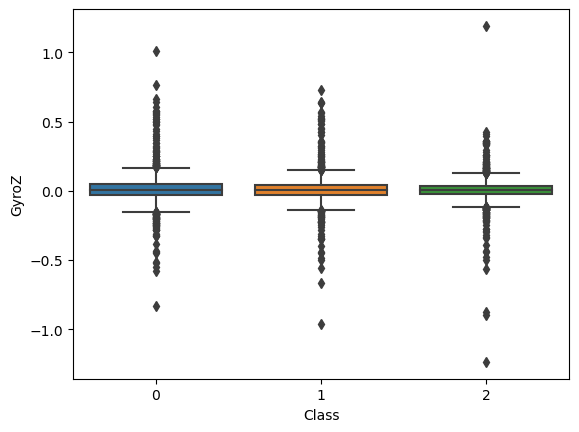

In [94]:
sns.boxplot(data=df, x='Class', y="GyroZ")

In [10]:
df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,1,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,1,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,1,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,1,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,1,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,2,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,2,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,2,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,2,3583791


<AxesSubplot:xlabel='AccX', ylabel='Count'>

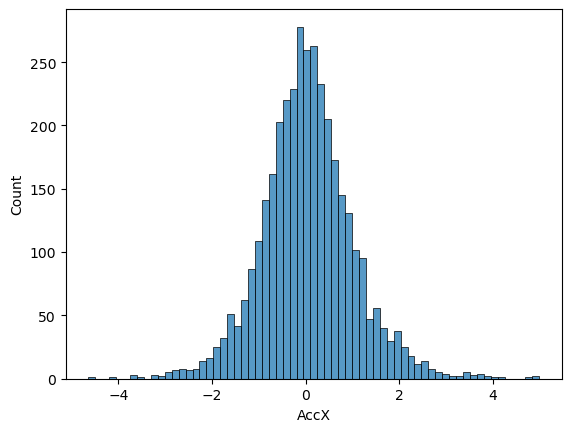

In [11]:
sns.histplot(data=df, x='AccX')

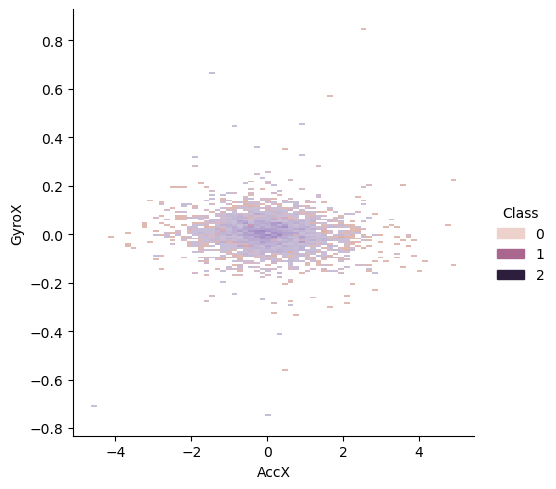

In [12]:
sns.displot(data=df, x='AccX', y='GyroX', hue='Class')

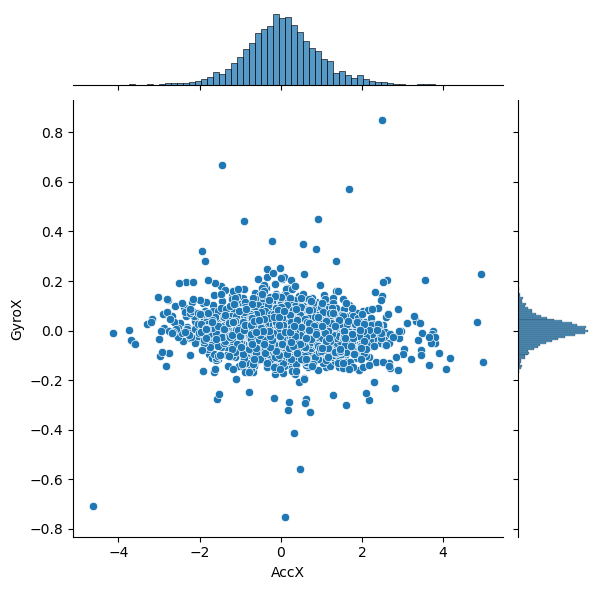

In [13]:
sns.jointplot(data=df, x='AccX', y='GyroX')

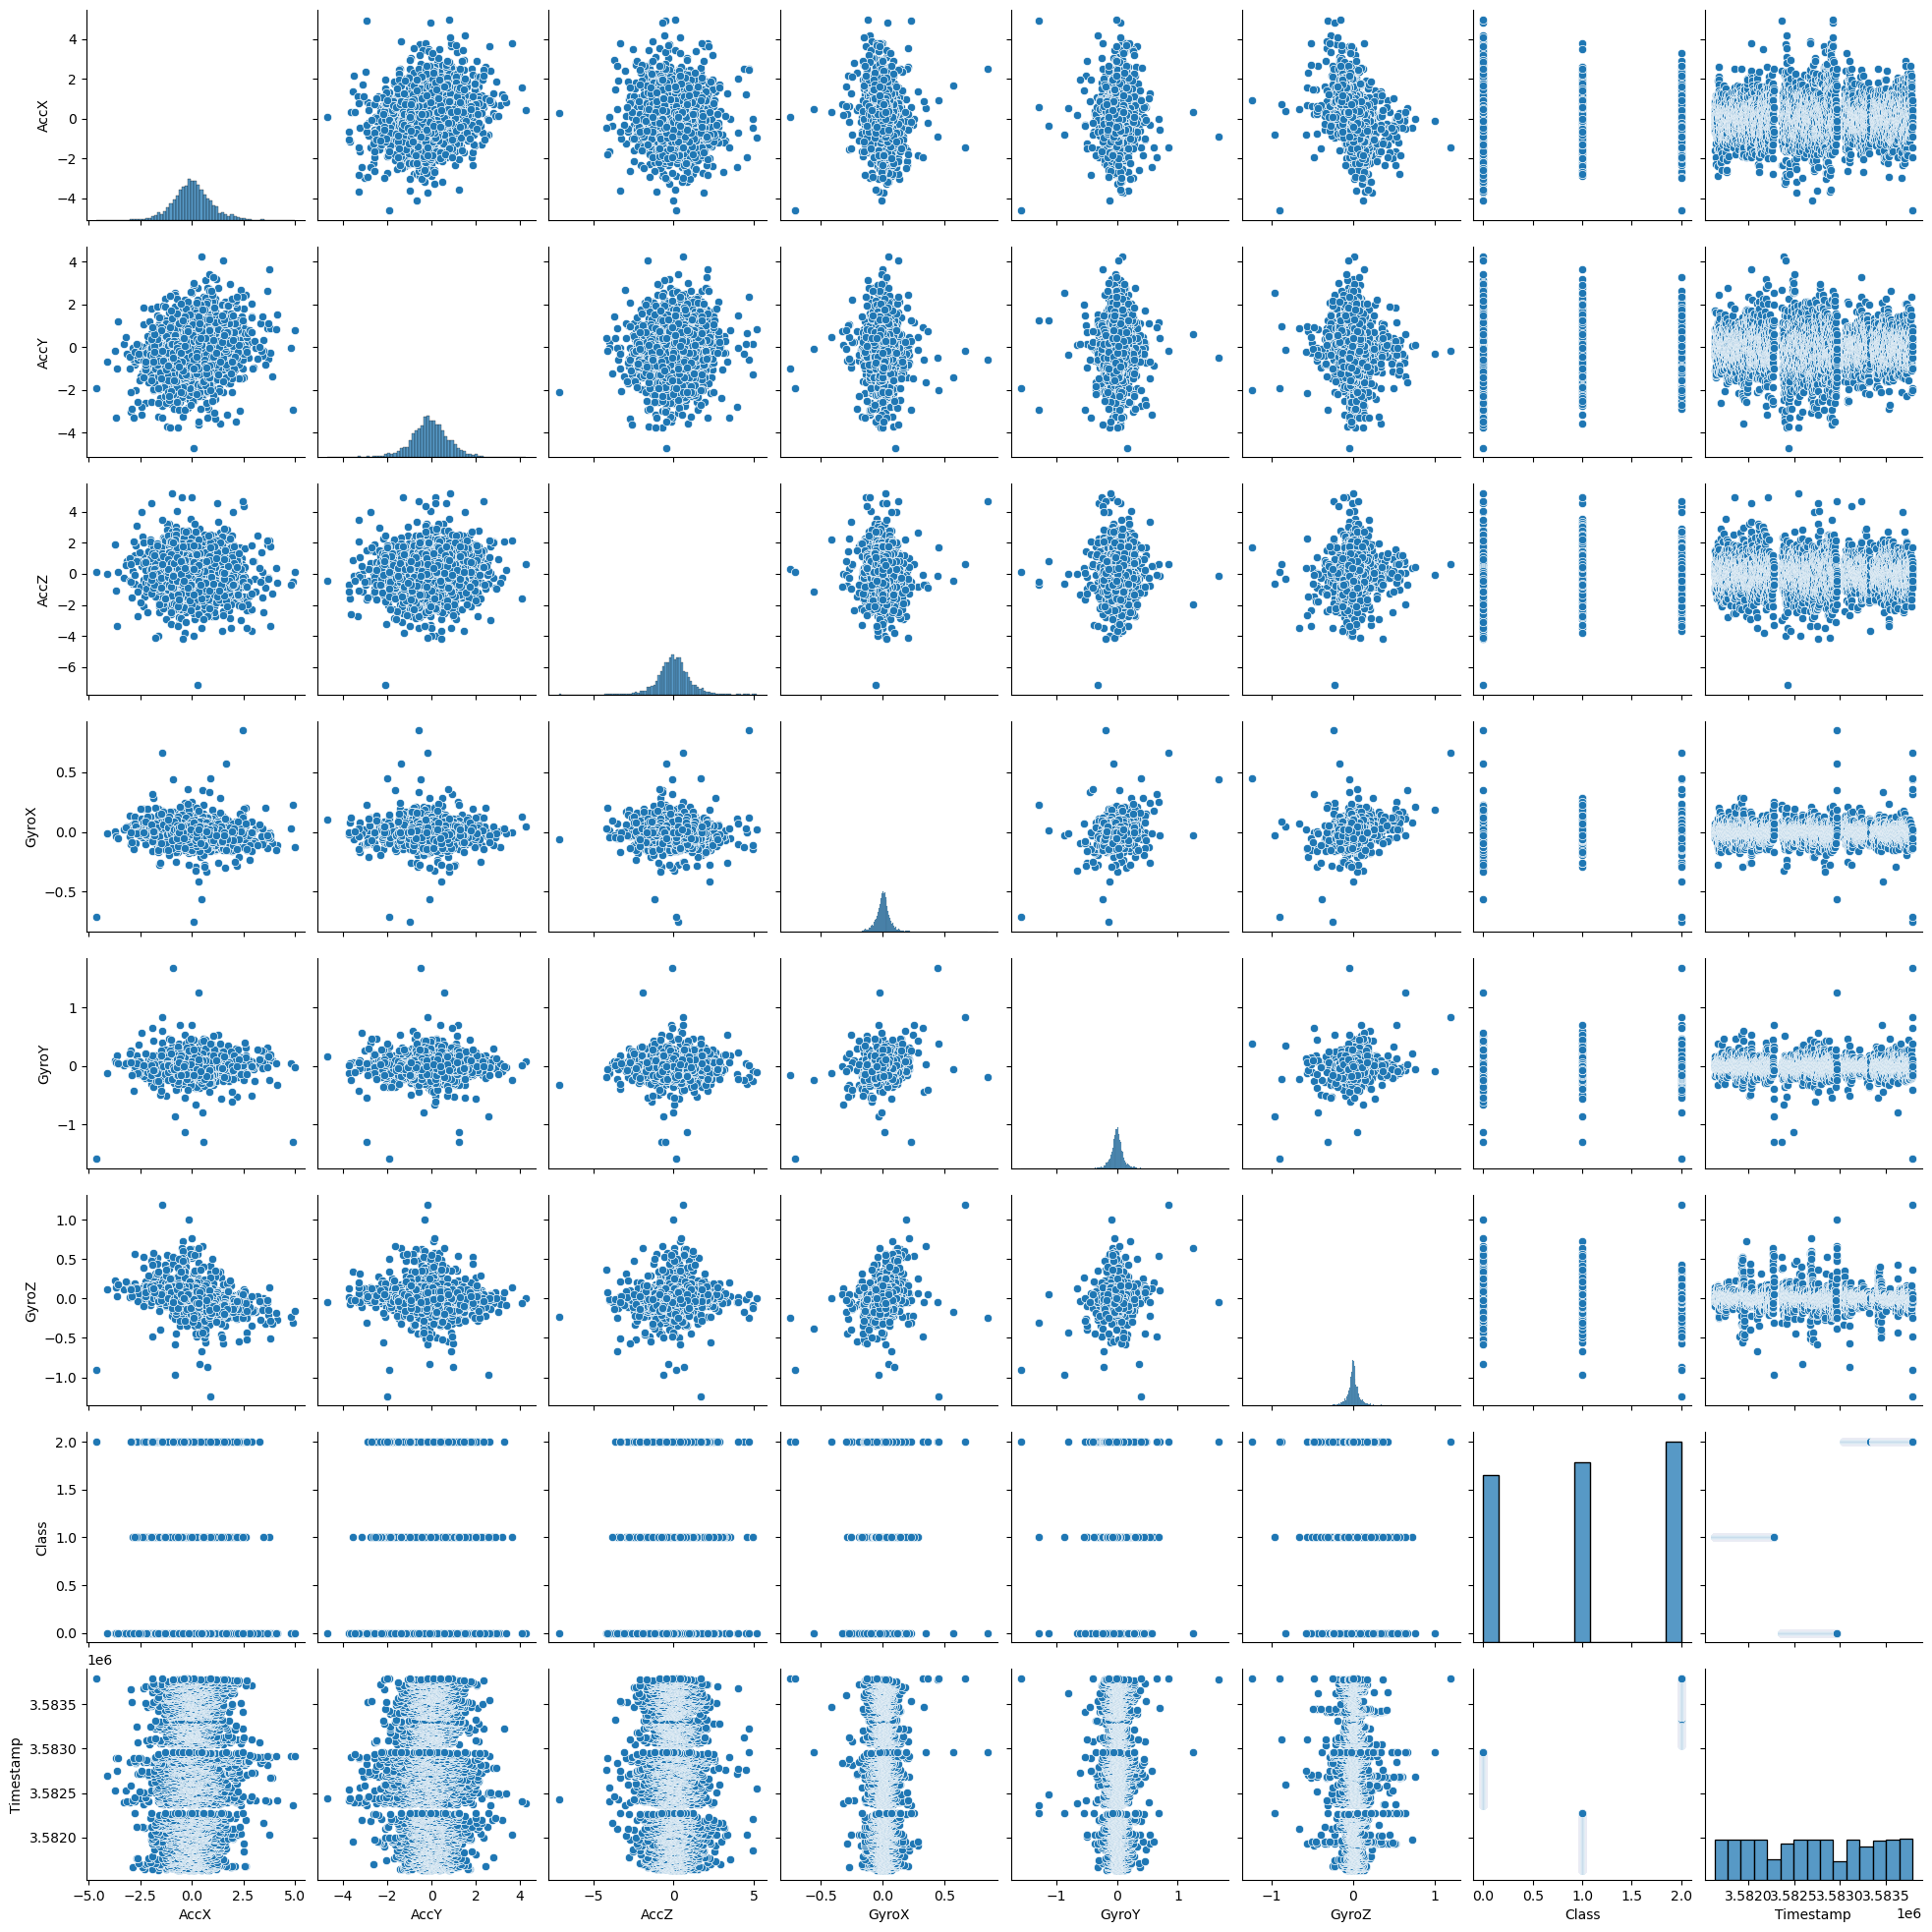

In [14]:
sns.pairplot(df)

In [15]:
df['AccX'].kurt()

1.6905732423330018

In [99]:
df['Gyro'].skew()

0.3457943643776975

In [17]:
print(df['GyroX'].kurt(), df['GyroX'].skew())

23.165309652651192 0.19161886804205286


In [18]:
df.groupby('Class').skew()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
Class,,,,,,,
0,0.314301,-0.123726,-0.271286,1.283115,-0.593431,1.080878,0.000004
1,0.052175,0.063235,0.392593,0.094939,-0.955632,0.524093,0.000065
2,0.024503,0.031893,0.151306,-0.803405,0.528541,-1.213092,-0.037327


In [25]:
df.groupby('Class').apply(pd.DataFrame.kurt)

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
Class,,,,,,,,
0,1.255537,0.904089,2.786605,25.835972,19.140002,10.331062,0.0,-1.199972
1,0.771276,1.484903,2.286334,2.877926,17.950332,13.851496,0.0,-1.200073
2,1.157177,1.018357,1.883290,31.126838,47.362066,39.832977,0.0,-1.254921


In [26]:
from scipy import stats
import matplotlib.pyplot as plt

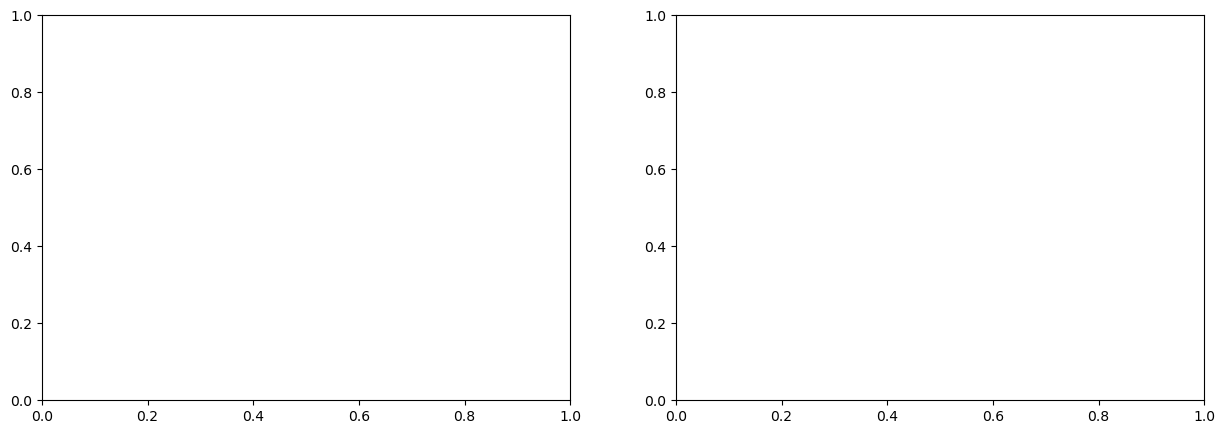

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

((array([-3.55332385, -3.31289896, -3.18012099, ...,  3.18012099,
          3.31289896,  3.55332385]),
  array([-4.636523 , -4.132884 , -3.7373357, ...,  4.8323727,  4.933154 ,
          4.9855475])),
 (0.9779492268551896, 0.040466917630340174, 0.9914413348501393))

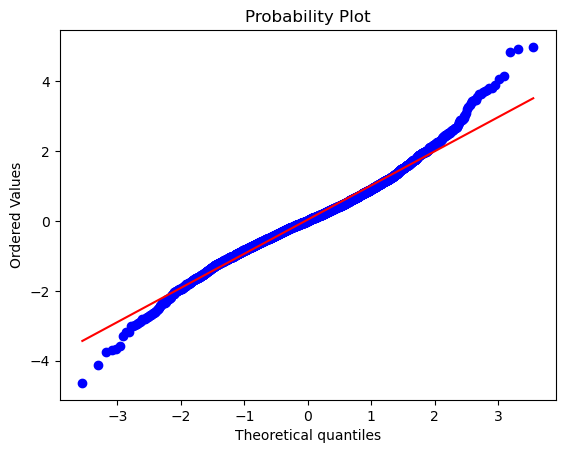

In [29]:
stats.probplot(df['AccX'], plot=plt)

<AxesSubplot:xlabel='Class', ylabel='AccX'>

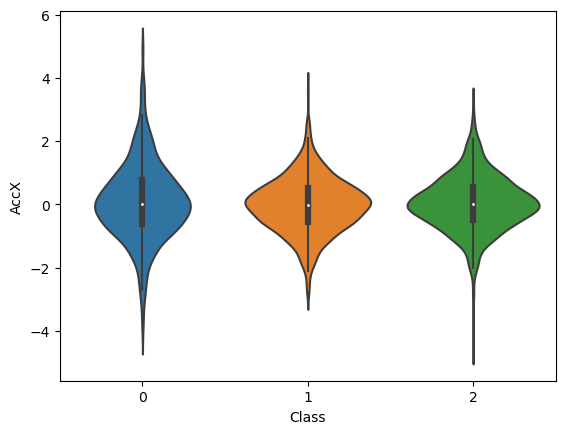

In [42]:
sns.violinplot(x=df['Class'], y=df['AccX'])

<AxesSubplot:xlabel='Class', ylabel='AccY'>

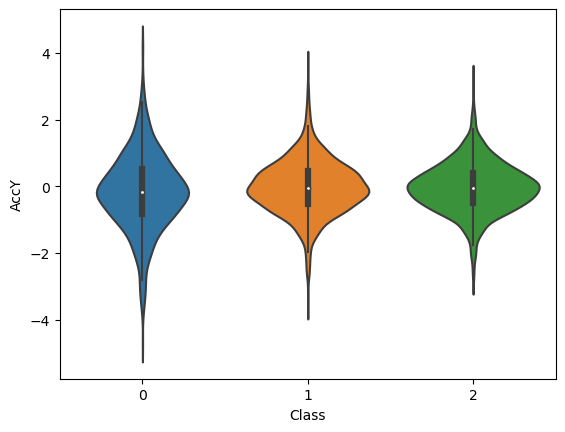

In [89]:
sns.violinplot(x=df['Class'], y=df['AccY'])

<AxesSubplot:xlabel='Class', ylabel='AccZ'>

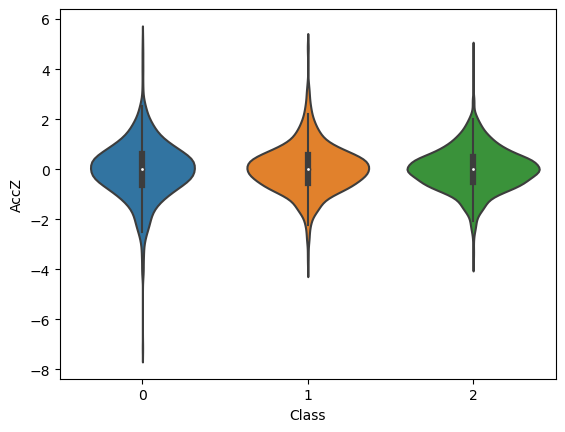

In [90]:
sns.violinplot(x=df['Class'], y=df['AccZ'])

<AxesSubplot:xlabel='Class', ylabel='GyroX'>

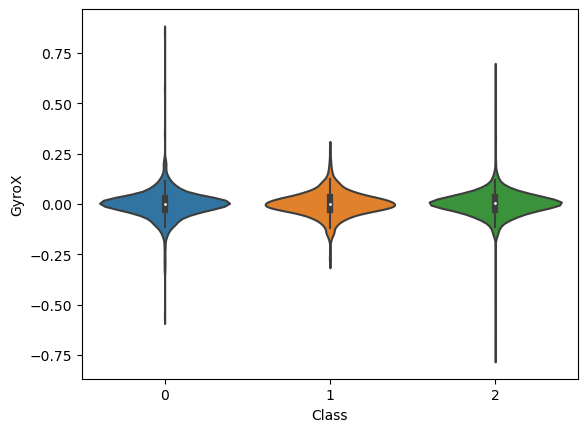

In [91]:
sns.violinplot(x=df['Class'], y=df['GyroX'])

<AxesSubplot:xlabel='Class', ylabel='GyroY'>

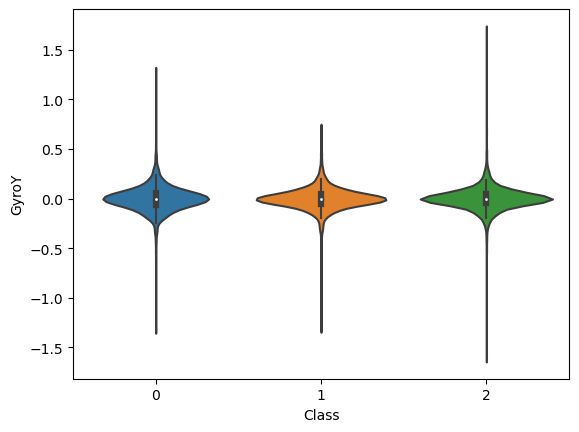

In [92]:
sns.violinplot(x=df['Class'], y=df['GyroY'])

<AxesSubplot:xlabel='Class', ylabel='GyroZ'>

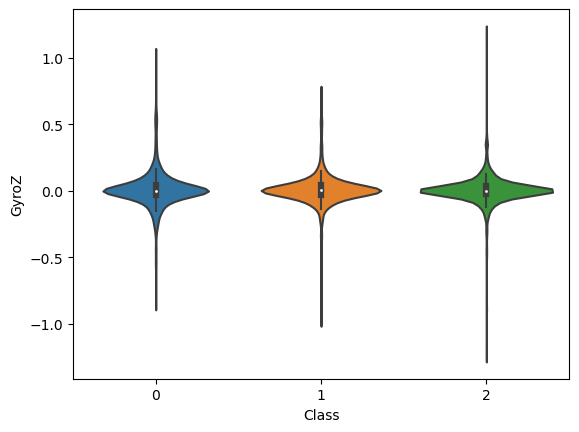

In [93]:
sns.violinplot(x=df['Class'], y=df['GyroZ'])

In [46]:
df.groupby('Class').count()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
Class,,,,,,,
0,1113,1113,1113,1113,1113,1113,1113
1,1200,1200,1200,1200,1200,1200,1200
2,1331,1331,1331,1331,1331,1331,1331


In [47]:
df['Class'].value_counts()

2    1331
1    1200
0    1113
Name: Class, dtype: int64

In [48]:
unique_values = df.nunique()

# calculate the percentage of unique values for each column
percent_unique = unique_values / len(df) * 100

# print the percentage of unique values for each column
print(percent_unique)

AccX         100.000000
AccY         100.000000
AccZ          99.945115
GyroX         14.434687
GyroY         22.310648
GyroZ         20.746432
Class          0.082327
Timestamp     54.006586
dtype: float64


In [49]:
sample = df.sample()

In [51]:
print(20 * df.shape[0] / 100)

728.8


In [52]:
sample = df.sample(729)

In [53]:
sample

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
3346,-0.239577,-1.317027,-0.346615,0.065515,0.314596,0.075671,2,3583631
1475,-0.173051,0.594558,1.082888,-0.065210,-0.122784,-0.025122,0,3582514
2417,-1.996729,-0.497511,-0.576376,0.125380,0.096517,0.137368,2,3583100
1525,-0.201330,0.363137,0.199813,0.011759,0.011606,-0.006185,0,3582541
2348,-0.452839,-0.465297,-0.166964,0.012981,0.017104,0.085445,2,3583063
...,...,...,...,...,...,...,...,...
2537,-0.027569,0.243699,0.470853,-0.029169,0.013439,0.005421,2,3583165
2487,0.222482,-1.296930,0.327703,0.044135,0.062919,0.047571,2,3583138
3229,-0.497982,-0.160403,0.205417,0.003818,0.006720,-0.002520,2,3583568
1117,0.102231,-1.033438,1.220714,-0.002291,0.014661,-0.040393,1,3582232


In [56]:
sample_statistics = sample.describe().transpose()

# Calculate summary statistics for the population dataset
population_statistics = df.describe().transpose()

# Compare the sample statistics with population statistics
comparison = sample_statistics.merge(population_statistics, how='inner', left_index=True, right_index=True)

print(comparison)

           count_x        mean_x       std_x         min_x         25%_x  \
AccX         729.0  8.724770e-02    0.979657 -3.737336e+00 -4.890307e-01   
AccY         729.0 -5.938744e-02    0.972758 -4.699795e+00 -6.068960e-01   
AccZ         729.0 -4.816042e-03    0.939868 -3.467773e+00 -5.763760e-01   
GyroX        729.0  4.329895e-03    0.062961 -4.127922e-01 -2.428189e-02   
GyroY        729.0  2.829756e-03    0.113417 -8.014552e-01 -4.948008e-02   
GyroZ        729.0  6.794828e-03    0.104101 -5.480225e-01 -2.573270e-02   
Class        729.0  1.101509e+00    0.795323  0.000000e+00  0.000000e+00   
Timestamp    729.0  3.582690e+06  654.930806  3.581630e+06  3.582106e+06   

                  50%_x         75%_x         max_x  count_y        mean_y  \
AccX       2.428877e-02  6.234211e-01  3.756986e+00   3644.0  4.046692e-02   
AccY      -9.849544e-02  4.862730e-01  4.245151e+00   3644.0 -7.341815e-02   
AccZ       5.037308e-03  5.458555e-01  3.204680e+00   3644.0  8.271386e-03   
Gyr

In [57]:
sample_statistics

,count,mean,std,min,25%,50%,75%,max
AccX,729.0,8.724770e-02,0.979657,-3.737336e+00,-4.890307e-01,2.428877e-02,6.234211e-01,3.756986e+00
AccY,729.0,-5.938744e-02,0.972758,-4.699795e+00,-6.068960e-01,-9.849544e-02,4.862730e-01,4.245151e+00
AccZ,729.0,-4.816042e-03,0.939868,-3.467773e+00,-5.763760e-01,5.037308e-03,5.458555e-01,3.204680e+00
GyroX,729.0,4.329895e-03,0.062961,-4.127922e-01,-2.428189e-02,4.428773e-03,3.375030e-02,3.495676e-01
GyroY,729.0,2.829756e-03,0.113417,-8.014552e-01,-4.948008e-02,3.665192e-03,5.436701e-02,6.921103e-01
GyroZ,729.0,6.794828e-03,0.104101,-5.480225e-01,-2.573270e-02,2.367103e-03,3.657556e-02,6.627125e-01
Class,729.0,1.101509e+00,0.795323,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
Timestamp,729.0,3.582690e+06,654.930806,3.581630e+06,3.582106e+06,3.582670e+06,3.583274e+06,3.583786e+06


In [58]:
population_statistics

,count,mean,std,min,25%,50%,75%,max
AccX,3644.0,4.046692e-02,0.985653,-4.636523e+00,-5.506954e-01,3.931045e-03,5.959871e-01,4.985548e+00
AccY,3644.0,-7.341815e-02,0.903408,-4.699795e+00,-5.925396e-01,-8.083267e-02,4.524008e-01,4.245151e+00
AccZ,3644.0,8.271386e-03,0.985061,-7.143998e+00,-5.584636e-01,2.261639e-03,5.561569e-01,5.171739e+00
GyroX,3644.0,1.592709e-03,0.066918,-7.518224e-01,-2.855795e-02,1.985312e-03,3.191771e-02,8.492554e-01
GyroY,3644.0,-1.273027e-03,0.126205,-1.587028e+00,-5.375614e-02,-1.832596e-03,5.131268e-02,1.679879e+00
GyroZ,3644.0,7.949043e-03,0.115687,-1.236468e+00,-2.939789e-02,2.977968e-03,4.085161e-02,1.190500e+00
Class,3644.0,1.059824e+00,0.816882,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
Timestamp,3644.0,3.582707e+06,642.147947,3.581629e+06,3.582121e+06,3.582702e+06,3.583270e+06,3.583791e+06


In [60]:
from scipy.stats import ttest_ind

In [63]:
t_statistic, p_value = ttest_ind(sample_statistics['mean'], population_statistics['mean'])
print(p_value)

0.9999974327111838


In [64]:
t_statistic, p_value = ttest_ind(sample_statistics['std'], population_statistics['std'])
print(p_value)

0.9890948113182202


In [65]:
t_statistic, p_value = ttest_ind(sample_statistics['25%'], population_statistics['25%'])
print(p_value)

0.9999977243679343


In [66]:
t_statistic, p_value = ttest_ind(sample_statistics['50%'], population_statistics['50%'])
print(p_value)

0.9999951291843987


In [67]:
t_statistic, p_value = ttest_ind(sample_statistics['75%'], population_statistics['75%'])
print(p_value)

0.9999994120168859


In [68]:
t_statistic, p_value = ttest_ind(sample_statistics['max'], population_statistics['max'])
print(p_value)

0.9999984209466561


In [77]:
from scipy.stats import zscore

z_scores = zscore(sample_statistics)

In [78]:
z_scores

,count,mean,std,min,25%,50%,75%,max
AccX,NaN,-0.377965,-0.376056,-0.377966,-0.377965,-0.377965,-0.377964,-0.377963
AccY,NaN,-0.377965,-0.376088,-0.377967,-0.377965,-0.377965,-0.377965,-0.377963
AccZ,NaN,-0.377965,-0.376240,-0.377966,-0.377965,-0.377965,-0.377964,-0.377964
GyroX,NaN,-0.377965,-0.380292,-0.377963,-0.377964,-0.377965,-0.377965,-0.377966
GyroY,NaN,-0.377965,-0.380059,-0.377964,-0.377964,-0.377965,-0.377965,-0.377966
GyroZ,NaN,-0.377965,-0.380102,-0.377963,-0.377964,-0.377965,-0.377965,-0.377966
Class,NaN,-0.377964,-0.376908,-0.377963,-0.377964,-0.377964,-0.377963,-0.377965
Timestamp,NaN,2.645751,2.645747,2.645751,2.645751,2.645751,2.645751,2.645751


In [79]:
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(data1, data2):
    
    return u_statistic, p_value

In [80]:
u_statistic, p_value = mannwhitneyu(sample_statistics['mean'], population_statistics['mean'])
print(p_value)

0.959129759129759


In [81]:
u_statistic, p_value = mannwhitneyu(sample_statistics['std'], population_statistics['std'])
print(p_value)

0.7209013209013208


In [82]:
u_statistic, p_value = mannwhitneyu(sample_statistics['min'], population_statistics['min'])
print(p_value)

0.49420085341360676


In [83]:
u_statistic, p_value = mannwhitneyu(sample_statistics['25%'], population_statistics['25%'])
print(p_value)

0.9162977979978499


In [84]:
u_statistic, p_value = mannwhitneyu(sample_statistics['50%'], population_statistics['50%'])
print(p_value)

0.4004675495719816


In [85]:
u_statistic, p_value = mannwhitneyu(sample_statistics['75%'], population_statistics['75%'])
print(p_value)

0.9162977979978499


In [86]:
u_statistic, p_value = mannwhitneyu(sample_statistics['max'], population_statistics['max'])
print(p_value)

0.3713249842122296


In [87]:
u_statistic, p_value = mannwhitneyu(sample_statistics['count'], population_statistics['count'])
print(p_value)

0.0001375860571660289


In [88]:
if df.sample(frac=1, random_state=1).equals(df):
    print("Sample was selected randomly.")
else:
    print("Sample was selected with bias.")

Sample was selected with bias.


In [131]:
def test(param):
    test2(**param)
def test2(x=None, **kwargs):
    print(x)

In [130]:
test({'x': 10})

10


In [1]:
import sys
sys.path.append('/usr/src/scripts')

In [2]:
from visualization import Visualization

In [3]:
vis = Visualization('/usr/src/datasets/driving-behavior/train_motion_data.csv', interpreter='Python')

AxesSubplot(0.125,0.11;0.775x0.77)


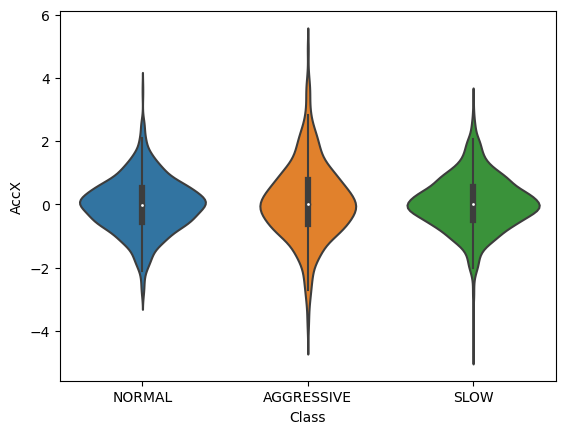

In [4]:
param = {
    'y' : vis.df['AccX'],
    'x' : vis.df['Class']
}
print(vis.distribution(param, graph_type='violin'))

AxesSubplot(0.125,0.11;0.775x0.77)


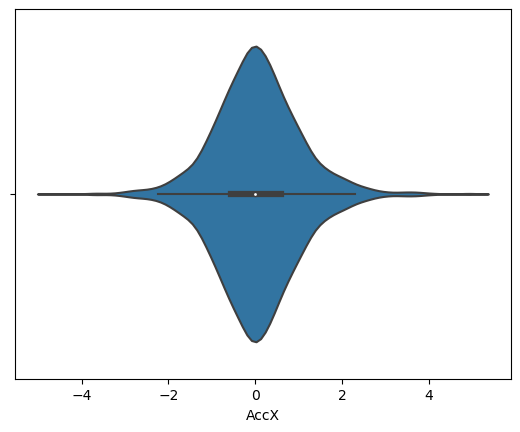

In [5]:
param = {
    'x' : vis.df['AccX'],
}
print(vis.distribution(graph_type='violin', param=param))


AxesSubplot(0.125,0.11;0.775x0.77)


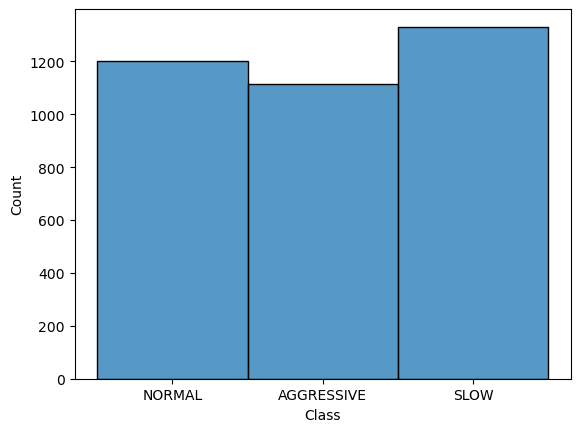

In [6]:
param = {
    'x' : vis.df['Class']
}
print(vis.histogram(param))

AxesSubplot(0.125,0.11;0.775x0.77)


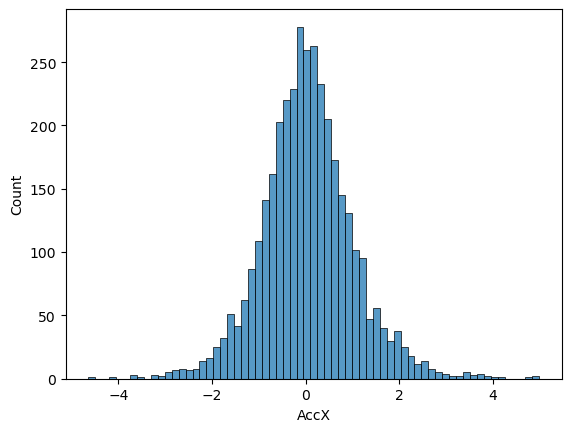

In [7]:
param = {
    'x' : vis.df['AccX']
}
print(vis.histogram(param))

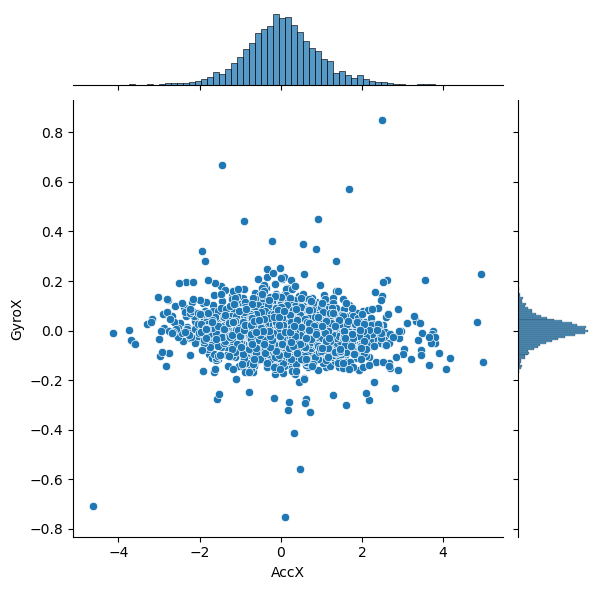

In [8]:
param = {
    'x' : vis.df['AccX'],
    'y' : vis.df['GyroX']
}
graph = vis.joint(param)

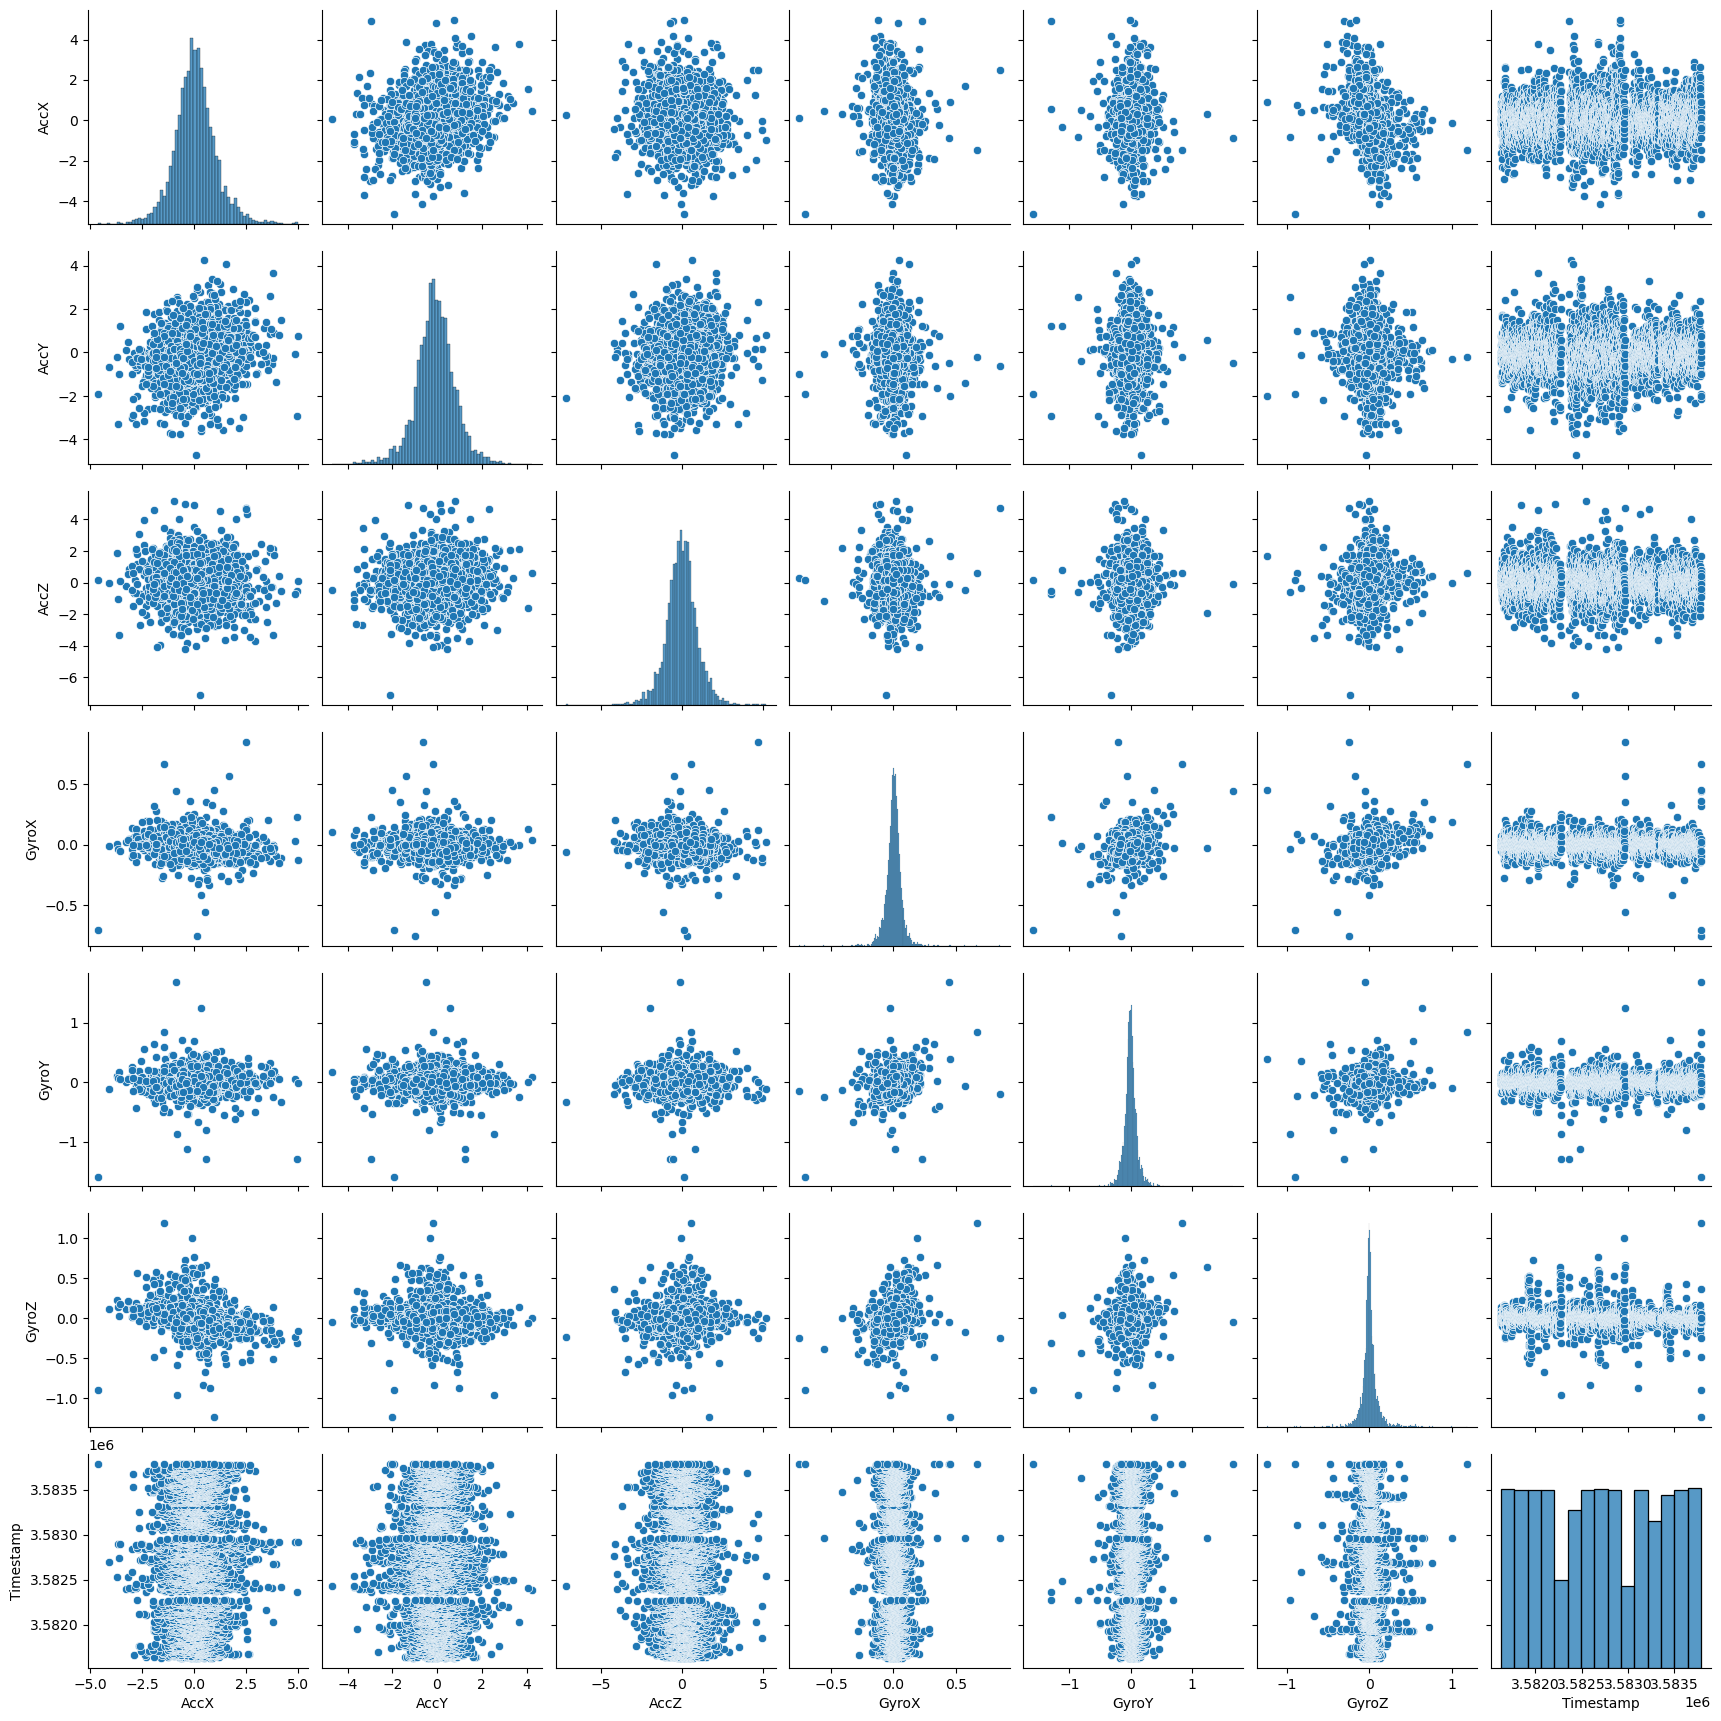

In [9]:
print(vis.pairplot())